# **Calibración de Cámaras y Corrección de Distorsión con OpenCV**

**Objetivo del Taller**

Explorar el proceso de calibración de cámaras utilizando un patrón de tablero
de ajedrez, simulando un defecto óptico (distorsión) y corrigiéndolo mediante
los parámetros obtenidos. Al finalizar, se espera que el estudiante entienda el
impacto de la calibración en la calidad visual de una imagen y pueda aplicar las
funciones fundamentales de OpenCV para visión artificial.

**Fundamentos Técnicos**
* **Calibración de cámara:** proceso que determina los parámetros internos de
una cámara (matriz de cámara) y su distorsión óptica (radial y tangencial).
* **Distorsión artificial:** deformación aplicada intencionalmente para estudiar
cómo la calibración puede corregir errores introducidos por las lentes.
* **Tablero de ajedrez:** patrón de alto contraste que permite detectar esquinas
con precisión, comúnmente usado en calibración.

Contenido inicial de imagenes_distorsionadas: ['.ipynb_checkpoints', '3.jpeg', '7.jpeg', '4.jpeg', '10.jpeg']
Archivos originales encontrados: ['imagenes_originales/3.jpeg', 'imagenes_originales/7.jpeg', 'imagenes_originales/4.jpeg', 'imagenes_originales/10.jpeg']
Imagen distorsionada guardada en imagenes_distorsionadas/3.jpeg


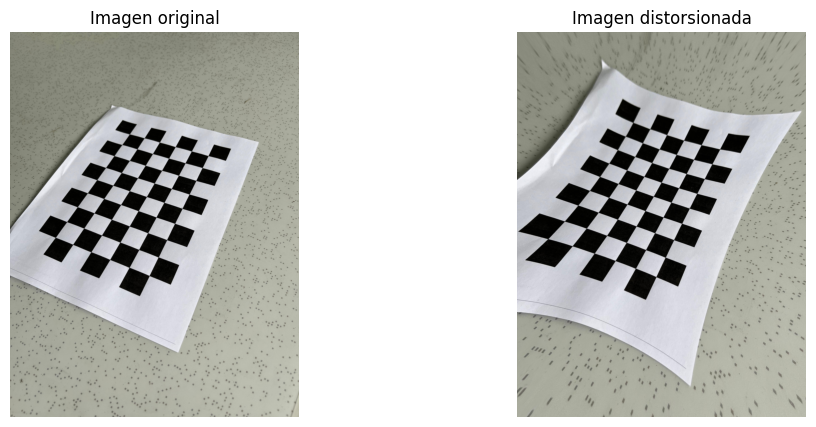

Imagen distorsionada guardada en imagenes_distorsionadas/7.jpeg


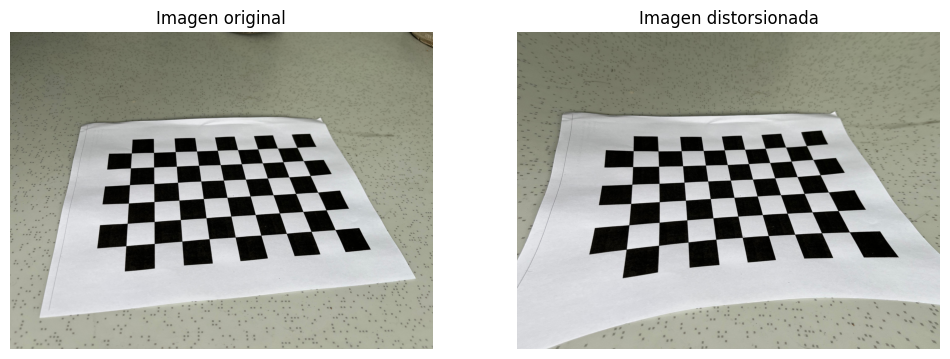

Imagen distorsionada guardada en imagenes_distorsionadas/4.jpeg


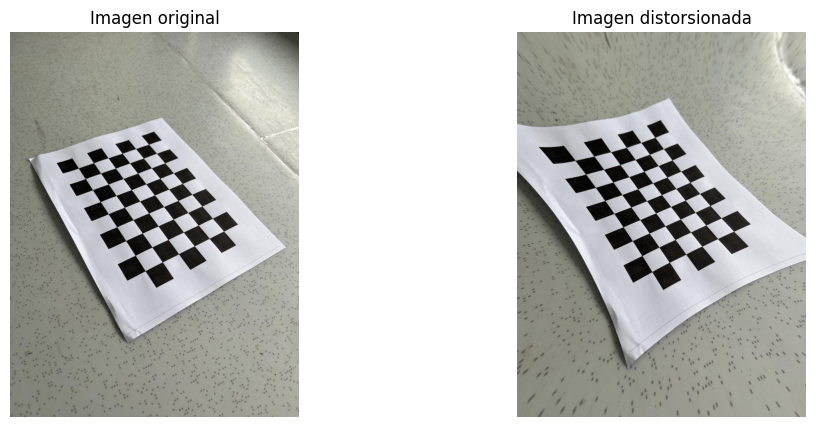

Imagen distorsionada guardada en imagenes_distorsionadas/10.jpeg


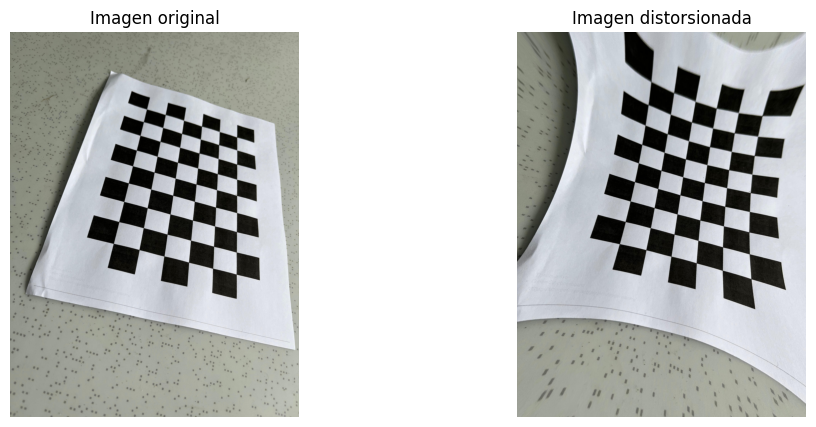

Imágenes distorsionadas guardadas en imagenes_distorsionadas/
Contenido de imagenes_distorsionadas después de guardar: ['.ipynb_checkpoints', '3.jpeg', '7.jpeg', '4.jpeg', '10.jpeg']
Archivos distorsionados encontrados: ['imagenes_distorsionadas/3.jpeg', 'imagenes_distorsionadas/7.jpeg', 'imagenes_distorsionadas/4.jpeg', 'imagenes_distorsionadas/10.jpeg']


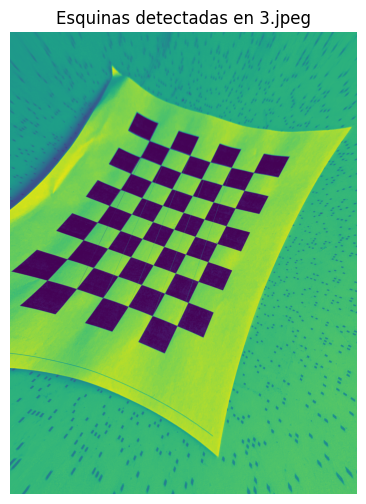

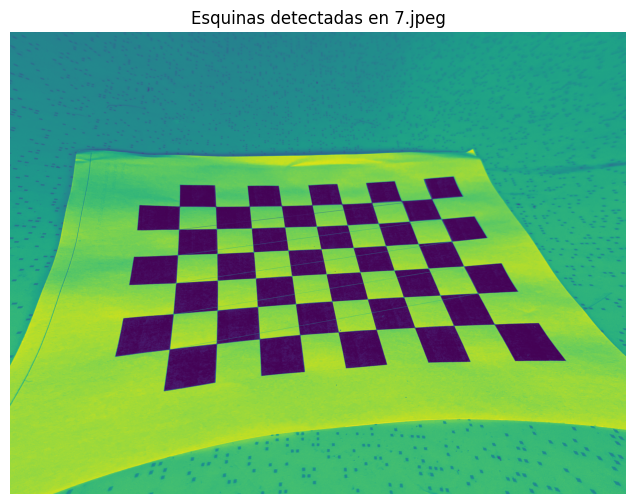

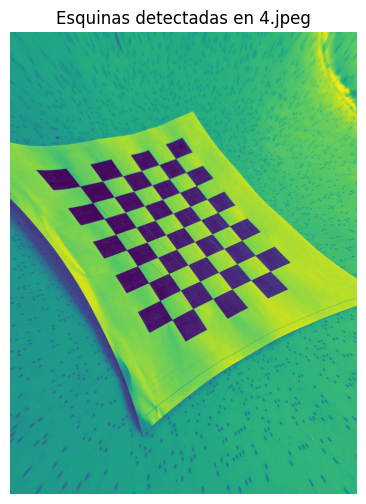

No se detectó el tablero en imagenes_distorsionadas/10.jpeg, se descarta. Intenta ajustar el ángulo o la iluminación.

Resultados de la calibración:
Matriz de cámara:
 [[3.15693724e+04 0.00000000e+00 7.16383522e+02]
 [0.00000000e+00 1.46522933e+04 1.92664576e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Coeficientes de distorsión:
 [[ 4.75845923e+01 -4.11167136e+03  1.32346562e+00 -6.12604492e-01
   1.43305491e+05]]
Error de reproyección: 21.858943750678492
Imagen corregida guardada en imagenes_corregidas/corrected_3.jpeg


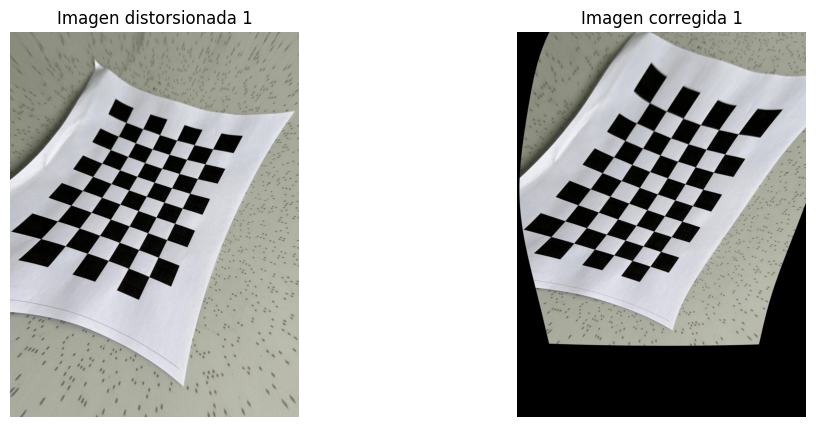

Imagen corregida guardada en imagenes_corregidas/corrected_7.jpeg


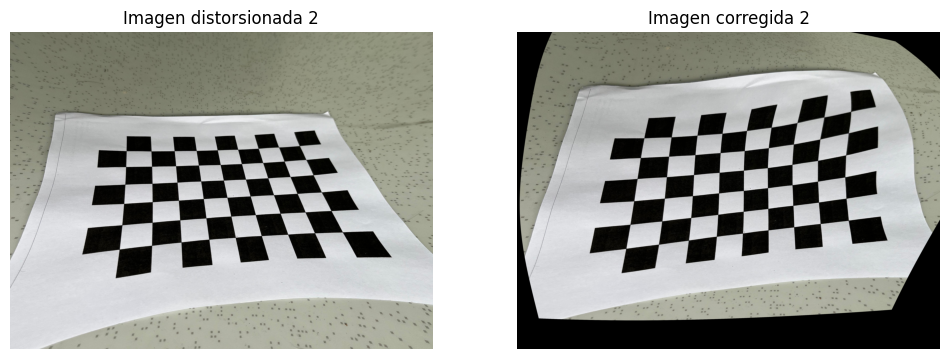

Imagen corregida guardada en imagenes_corregidas/corrected_4.jpeg


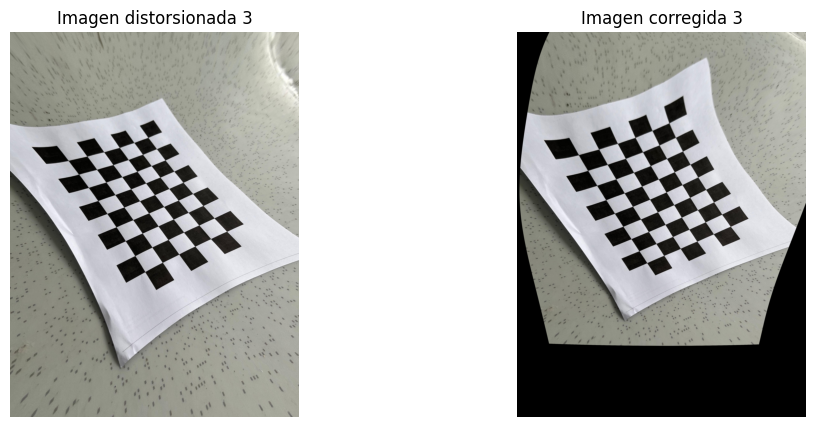

Imagen corregida guardada en imagenes_corregidas/corrected_10.jpeg


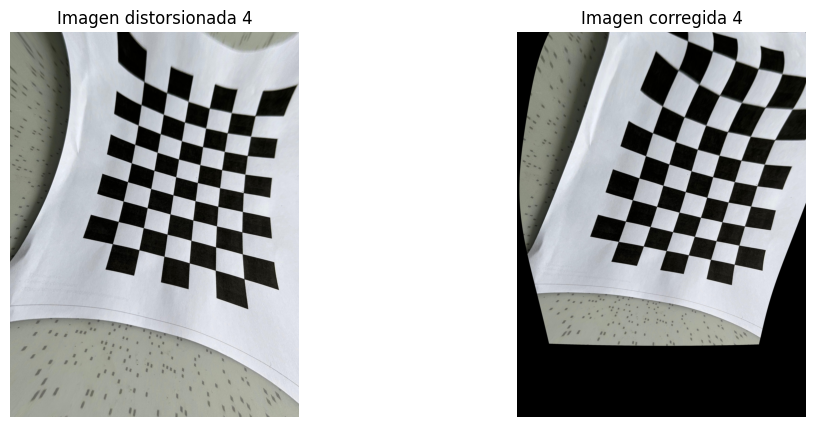

Imágenes corregidas guardadas en imagenes_corregidas/
Contenido de imagenes_corregidas: ['.ipynb_checkpoints', 'corrected_10.jpeg', 'corrected_4.jpeg', 'corrected_3.jpeg', 'corrected_7.jpeg']


In [18]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

# Definir las dimensiones
CHECKERBOARD = (9, 6)
SQUARE_SIZE = 25

objpoints = []  # Puntos 3D en el espacio del tablero
imgpoints = []  # Puntos 2D en las imágenes

# Definir las coordenadas 3D del tablero
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
objp *= SQUARE_SIZE

# Directorios para las imágenes
original_dir = 'imagenes_originales/'
distorted_dir = 'imagenes_distorsionadas/'
corrected_dir = 'imagenes_corregidas/'

# Crear directorios si no existen
os.makedirs(original_dir, exist_ok=True)
os.makedirs(distorted_dir, exist_ok=True)
os.makedirs(corrected_dir, exist_ok=True)
print("Contenido inicial de imagenes_distorsionadas:", os.listdir(distorted_dir))

# === Paso 2: Aplicación de Distorsión Artificial ===
# Ajustar coeficientes para una distorsión más notoria
k1, k2, p1, p2, k3 = -0.8, 0.3, 0.01, 0.01, 0.0  # Valores más altos para mayor distorsión
dist_coeffs = np.array([k1, k2, p1, p2, k3], dtype=np.float32)

image_files = glob.glob(original_dir + '*.jpeg')
print("Archivos originales encontrados:", image_files)

if not image_files:
    raise FileNotFoundError(f"No se encontraron imágenes en {original_dir}")

# Visualizar una imagen original y su versión distorsionada para comparación
for fname in image_files:
    img = cv2.imread(fname)
    if img is None:
        print(f"No se pudo cargar {fname}, se omite.")
        continue
    h, w = img.shape[:2]
    focal_length = w
    center = (w / 2, h / 2)
    camera_matrix = np.array([[focal_length, 0, center[0]],
                              [0, focal_length, center[1]],
                              [0, 0, 1]], dtype=np.float32)

    map1, map2 = cv2.initUndistortRectifyMap(camera_matrix, dist_coeffs, None, camera_matrix, (w, h), cv2.CV_16SC2)
    distorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR)
    distorted_path = os.path.join(distorted_dir, os.path.basename(fname))
    success = cv2.imwrite(distorted_path, distorted_img)
    if success:
        print(f"Imagen distorsionada guardada en {distorted_path}")
    else:
        print(f"Fallo al guardar {distorted_path}")

    # Visualizar la imagen original y la distorsionada
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Imagen original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(distorted_img, cv2.COLOR_BGR2RGB))
    plt.title("Imagen distorsionada")
    plt.axis('off')

    plt.show()

print(f"Imágenes distorsionadas guardadas en {distorted_dir}")
print("Contenido de imagenes_distorsionadas después de guardar:", os.listdir(distorted_dir))

# === Paso 3: Detección del Patrón ===
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.0001)

distorted_files = glob.glob(distorted_dir + '*.jpeg')
print("Archivos distorsionados encontrados:", distorted_files)

if not distorted_files:
    raise FileNotFoundError(f"No se encontraron imágenes en {distorted_dir}")

img_size = None

for fname in distorted_files:
    img = cv2.imread(fname)
    if img is None:
        print(f"No se pudo cargar {fname}, se omite.")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    if img_size is None:
        img_size = gray.shape[::-1]

    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, flags=flags)

    if ret:
        corners_refined = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        objpoints.append(objp)
        imgpoints.append(corners_refined)
        cv2.drawChessboardCorners(img, CHECKERBOARD, corners_refined, ret)
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        plt.title(f"Esquinas detectadas en {os.path.basename(fname)}")
        plt.axis('off')
        plt.show()
    else:
        print(f"No se detectó el tablero en {fname}, se descarta. Intenta ajustar el ángulo o la iluminación.")

if not objpoints or not imgpoints:
    raise ValueError("No se detectaron suficientes tableros para la calibración.")

# === Paso 4: Calibración de la Cámara ===
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, img_size, None, None
)

print("\nResultados de la calibración:")
print("Matriz de cámara:\n", camera_matrix)
print("Coeficientes de distorsión:\n", dist_coeffs)
print("Error de reproyección:", ret)

# === Paso 5: Corrección de las Imágenes ===
for i, fname in enumerate(distorted_files[:4]):
    img = cv2.imread(fname)
    if img is None:
        print(f"No se pudo cargar {fname}, se omite.")
        continue
    h, w = img.shape[:2]

    undistorted_img = cv2.undistort(img, camera_matrix, dist_coeffs)

    corrected_path = os.path.join(corrected_dir, f"corrected_{os.path.basename(fname)}")
    success = cv2.imwrite(corrected_path, undistorted_img)
    if success:
        print(f"Imagen corregida guardada en {corrected_path}")
    else:
        print(f"Fallo al guardar {corrected_path}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Imagen distorsionada {i+1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Imagen corregida {i+1}")
    plt.axis('off')

    plt.show()

print(f"Imágenes corregidas guardadas en {corrected_dir}")
print("Contenido de imagenes_corregidas:", os.listdir(corrected_dir))